# Project Masculinity

Welcome to the cumulative project on clustering algorithms! In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from FiveThirtyEight . FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

To begin, take a look at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. After looking through some of the questions asked, take a look at FiveThirtyEight's article <a href="https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/" target = "_blank">What Do Men Think It Means To Be A Man?</a> to see their major takeaways. We're going to try to find more insights using machine learning.



In [26]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")
print(survey.columns)
survey.head()

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


# Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. Let's once again consider question 7 ( How often would you say you do each of the following?). We can't cluster the data using the phrases `"Often"` or `"Rarely"`, but we can turn those phrases into numbers. For example, we could map the data in the following way: 
* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.

question 1 (In general, how masculine or “manly” do you feel?)

* `"Very masculine"` -> `3`
* `"Somewhat masculine"` ->  `2`
* `"Not very masculine"` -> `1` 
* `"Not at all masculine"` -> `0`


In [27]:
print(survey.q0007_0001.unique())
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
survey['q0001'] = survey['q0001'].map({"Very masculine" :3,"Somewhat masculine":2,"Not very masculine":1 ,"Not at all masculine": 0})    
print(survey['q0007_0001'].value_counts())  
print(survey['q0001'].value_counts())   

['Often' 'Rarely' 'Sometimes' 'Never, but open to it'
 'Never, and not open to it' 'No answer']
3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64
2.0    617
3.0    443
1.0     97
0.0     21
Name: q0001, dtype: int64


# Plotting the Data

We now have 11 different features that we could use in our KMeans algorithm. Before we jump into clustering, let's graph some of these features on a 2D graph. 
 
1] Question about asking a friend for professional advice.

2] Question about asking a friend for personal advice.

6]Have sexual relations with women, including anything from kissing to sex

7]Have sexual relations with men, including anything from kissing to sex



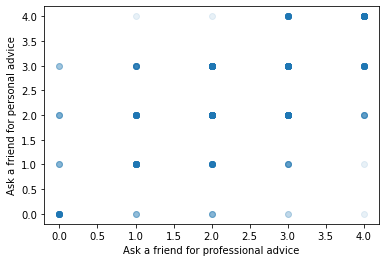

In [18]:
from matplotlib import pyplot as plt

plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

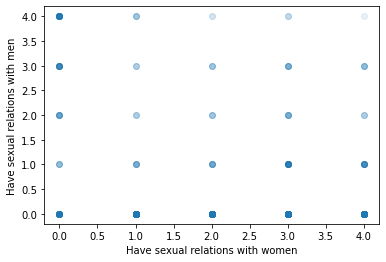

In [19]:
plt.scatter(survey["q0007_0006"], survey["q0007_0007"], alpha = 0.1)
plt.xlabel("Have sexual relations with women")
plt.ylabel("Have sexual relations with men")
plt.show()

# Building the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 


In [28]:
from sklearn.cluster import KMeans
cols_to_cluster = ["q0001","q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
rows_to_cluster = survey.dropna(subset=cols_to_cluster)
model = KMeans(n_clusters = 2)
model.fit(rows_to_cluster[cols_to_cluster])


KMeans(n_clusters=2)

# Separating the Cluster Members



In [29]:
print(model.labels_)

cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(model.labels_)):
    if model.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif model.labels_[i] == 1:
        cluster_one_indices.append(i)
        
print(cluster_zero_indices)

[0 0 1 ... 0 1 1]
[0, 1, 4, 7, 10, 12, 13, 14, 15, 19, 21, 22, 23, 24, 26, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 47, 53, 56, 57, 58, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 76, 77, 78, 79, 80, 88, 94, 95, 97, 98, 99, 100, 103, 104, 105, 107, 109, 110, 112, 115, 116, 117, 119, 120, 121, 122, 128, 130, 131, 132, 133, 135, 139, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 172, 173, 175, 176, 177, 178, 182, 184, 186, 187, 188, 190, 193, 197, 199, 200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 225, 227, 228, 231, 232, 235, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 255, 258, 259, 260, 261, 263, 264, 266, 267, 269, 270, 271, 273, 274, 275, 279, 280, 281, 282, 283, 285, 286, 287, 288, 290, 291, 295, 296, 299, 300, 301, 302, 304, 306, 307, 308, 309, 311, 313, 314, 315, 317, 318, 320, 321, 322, 323, 

# Investigating the Cluster Members

Now that we have the indices for each cluster, let's look at some stats about these two clusters. we can get the rows of the DataFrame that correspond to cluster zero by doing the following:

In [30]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

Post graduate degree    0.3712
College or more         0.3088
Some college            0.2384
High school or less     0.0816
Name: educ4, dtype: float64
College or more         0.333333
Some college            0.287179
Post graduate degree    0.256410
High school or less     0.120513
Name: educ4, dtype: float64


We've found out that by answering those 7 questions people don't fall into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education!

In this project, we have used a survey conducted by 538 to find patterns in the way men view masculinity.
